<a href="https://colab.research.google.com/github/NikhithaVarma/Project/blob/main/Ecommerce_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("Ecommerce-data.csv",encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [187]:
df.shape

(541909, 8)

In [188]:
#Removing the duplicate entries from the data
df=df.drop_duplicates()
df.shape

(536641, 8)

In [189]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

There are null values in the columns description and customerid, we can delete/discard them

In [190]:
df = df.dropna(subset=['Description', 'CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [191]:
df.shape

(401604, 8)

In [192]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [193]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [194]:
# Changing Datatype of customerid to 'int'
df["CustomerID"]=df["CustomerID"].astype("int")
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [195]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


**Exploring the data**


Looking for the total number of unique products, transactions, and customers in the data.

In [196]:
df['CustomerID'].value_counts()

17841    7812
14911    5898
14096    5128
12748    4459
14606    2759
         ... 
18068       1
13256       1
15590       1
16138       1
15389       1
Name: CustomerID, Length: 4372, dtype: int64

In [197]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          1
Name: Description, Length: 3896, dtype: int64

In [198]:
df['InvoiceNo'].value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560912      1
560913       1
560917       1
572879       1
553049       1
Name: InvoiceNo, Length: 22190, dtype: int64

So, There are **4372 customers, 3896 products and 22190 transactions**.

For 3896 products, there are 22190 transactions in the data which means that each product is likely to have multiple transactions in the data

In [199]:
df_cleaned=df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


Creating a new variable that indicates the total price of every purchase

In [200]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * df_cleaned['Quantity']
df_cleaned.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [201]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
 8   TotalPrice   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.6+ MB


In [202]:
#deleting the columns which are not necessary
df_cleaned.drop(['Country'], axis=1,inplace=True)
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,16.60


**Insight on Products similarity**

A short description of the products is given in the Description variable.

Now I intend to use the description column in order to group the products into different categories

In [203]:
df_cleaned['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 401604, dtype: object

In [204]:
#replacing the symbols with space
df_cleaned['Products']= df_cleaned['Description'].str.replace("[^a-zA-Z0-9]", " ")
df_cleaned['Products']

0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Products, Length: 401604, dtype: object

Replacing short words

In [205]:
df_cleaned['Products']=df_cleaned['Products'].apply(lambda row:' '.join([word for word in row.split() if len(word)>2]))
df_cleaned['Products']

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905              CHILDREN APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Products, Length: 401604, dtype: object

LowerCase character

In [206]:
#convert the entire text to lowercase
df_cleaned['Products']=[desc.lower() for desc in df_cleaned['Products']]
df_cleaned['Products']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Products, Length: 401604, dtype: object

Remove stop words

In [207]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words=stopwords.words('english')
# Making custom list of words to be removed 
add_words = ['childrens','blue','red','white','pink','green','grey','orange','black','spaceboy','rise','art','bakelike','set','design','retrospot','time','sign','christmas','children','pack','love','small','large','jumbo']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(des):
    # iNPUT : IT WILL TAKE ROW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    desc_tokenized = word_tokenize(des)
    des_new = " ".join([i for i in desc_tokenized  if i not in stop_words])
    return des_new

# Removing stopwords
df_cleaned['Products'] = [remove_stopwords(d) for d in df_cleaned['Products']]
df_cleaned['Products']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                  hanging heart light holder
1                               metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4                         woolly hottie heart
                         ...                 
541904                                napkins
541905                       apron dolly girl
541906                     cutlery dolly girl
541907                  cutlery circus parade
541908                           baking piece
Name: Products, Length: 401604, dtype: object

Lemmatization

In [208]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df_cleaned['Products']= df_cleaned['Products'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [209]:
df_cleaned['Products']

0                  hang heart light holder
1                            metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4                      woolly hottie heart
                        ...               
541904                              napkin
541905                    apron dolly girl
541906                  cutlery dolly girl
541907               cutlery circus parade
541908                          bake piece
Name: Products, Length: 401604, dtype: object

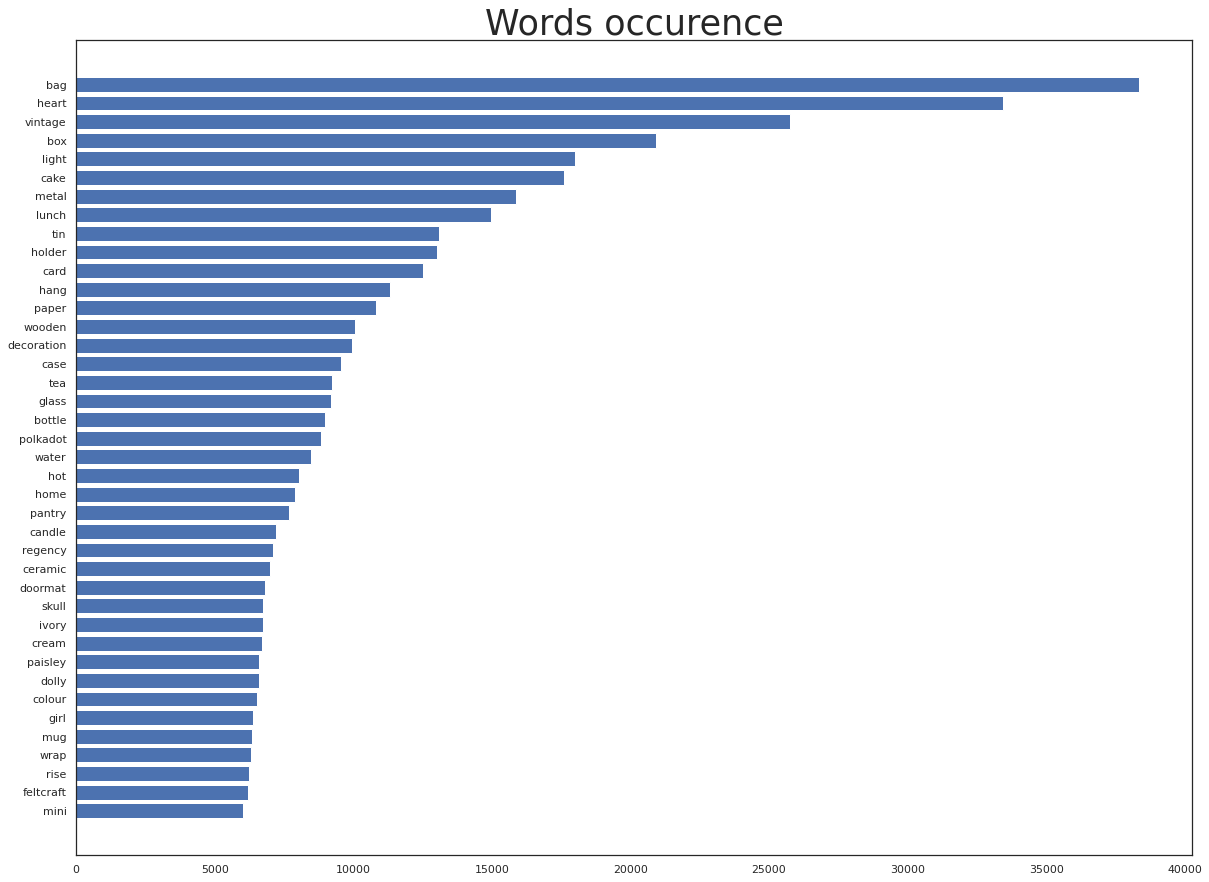

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data



#Extracts words into list and count frequency
all_words = ' '.join([text for text in df_cleaned['Products']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 25 words by frequency
words_df = words_df.nlargest(columns="count", n = 40) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,15))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.title("Words occurence",fontsize = 35)
plt.show()

Bag of Words Model

In [211]:
list_products=df_cleaned['Products'].unique()
list_products

array(['hang heart light holder', 'metal lantern',
       'cream cupid heart coat hanger', ..., 'crystal skull phone charm',
       'cream hang heart light holder', 'paper craft little birdie'],
      dtype=object)

In [212]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 3000 tokens
tfidf = TfidfVectorizer(max_features=3000)
prods = tfidf.fit_transform(list_products).toarray()
featureNames = tfidf.get_feature_names()

prods


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Creating clusters of products**

Applying KMeans to classify the products

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns                                               
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings
filterwarnings('ignore')


scaler = StandardScaler()
prods_std = scaler.fit_transform(prods) # standardise data

km = KMeans(n_clusters=10) # applying k = 15
km.fit(prods_std) # fit the data - identify pattern, does everything
clusters = km.predict(prods_std)



centroids = km.cluster_centers_ # final centroid points
centroids
km.labels_ # measures how tight my groups are. 
km.inertia_


5823445.380518943

Checking the number of elements in every class


In [246]:
pd.Series(clusters).value_counts()

0    3131
1     168
2      43
5      42
4       5
9       3
6       3
7       2
8       1
3       1
dtype: int64

There are less no of elements in some of the classes so we need to check for the best val of k

Determining K

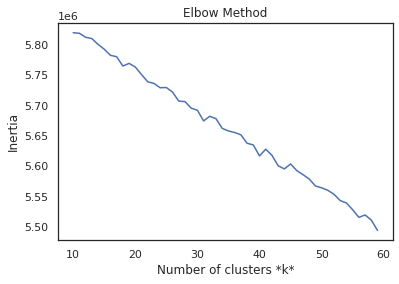

In [217]:
# Elbow plot
# We make a plot between k value and inertia

wcss = []  # storer inertia for all values of k 

for k in range(10, 60):
    km = KMeans(init='k-means++', n_clusters = k)
    km.fit(prods_std)
    wcss.append(km.inertia_)

# Plot sse against k
plt.plot(range(10,60),wcss)
plt.title("Elbow Method")
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 
plt.show()




In [261]:
#from the above plot lets take k=20 is the best val of k

from sklearn.cluster import KMeans
km = KMeans(n_clusters=20) # applying k = 20
km.fit(prods_std)
clusters=km.predict(prods_std)


**Characterizing the content of clusters**

creating the categorical variable Product_categ where I indicate the cluster of each product:

In [262]:
corresp = dict()
for key, val in zip (list_products, clusters):
    corresp[key] = val 

df_cleaned['Product_categ'] = df_cleaned.loc[:, 'Products'].map(corresp)
df_cleaned.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Products,Product_categ
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,15.30,hang heart light holder,19
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,20.34,metal lantern,19
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,22.00,cream cupid heart coat hanger,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,20.34,knit union flag hot water bottle,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,20.34,woolly hottie heart,0
...,...,...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688,15.30,lunch box cutlery,2
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688,50.40,cake case,0
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688,13.20,dinosaur cake case,0
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688,13.20,paisley cake case,0


**Customer categories**

In [263]:
X=df_cleaned[['CustomerID','Product_categ']]
X

,CustomerID,Product_categ
0,17850,19
1,17850,19
2,17850,0
3,17850,0
4,17850,0
...,...,...
541904,12680,0
541905,12680,0
541906,12680,2
541907,12680,2


In [264]:
X['Product_categ'].value_counts()

0     316990
16     41486
19     29288
2       5462
8       4715
7       1828
6        477
14       453
13       195
4        172
17       135
18       115
3         70
1         66
11        52
5         49
15        23
10        19
12         6
9          3
Name: Product_categ, dtype: int64

We define clusters of customers from the standardized matrix using the k-means algorithm from scikit-learn

In [265]:
#standardizing the customer id and products categ data

scaler = StandardScaler()
X_std = scaler.fit_transform(X) # standardise data
X_std

array([[ 1.49873585,  2.37891714],
       [ 1.49873585,  2.37891714],
       [ 1.49873585, -0.48861821],
       ...,
       [-1.51759324, -0.18677239],
       [-1.51759324, -0.18677239],
       [-1.51759324, -0.18677239]])

In [266]:
##Applying k-means to cluster the customers
km = KMeans(n_clusters=10) # applying k = 10
km.fit(X_std) # fit the data - identify pattern, does everything

centroids = km.cluster_centers_ # final centroid points
centroids
km.labels_ # measures how tight my groups are. 
km.inertia_


25618.611910450294

**Determining K using elbow plot**

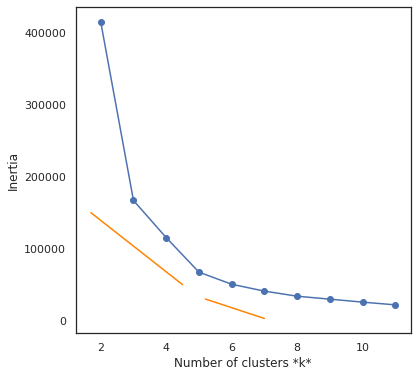

In [273]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(2, 12))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.plot([1.7, 4.5], [150000, 50000], color='#FF8400')
plt.plot([5.2, 7.0], [30000, 3000], color='#FF8400')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

In [276]:
# from the above plot i got k=5 is the best val of k, so applying k means with k=5

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5) # applying k = 5
km.fit(X_std)
clusters=km.predict(X_std)
centroids = km.cluster_centers_
#centroids
km.inertia_ # measures how tight my clusters are -> lower the better (lower => the clusters are more tight)
clusters

array([3, 3, 1, ..., 0, 0, 0], dtype=int32)

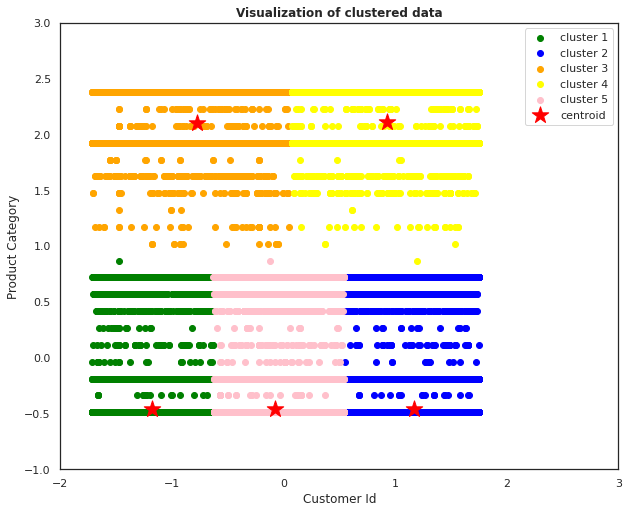

In [277]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
plt.scatter(X_std[km.labels_ == 3, 0], X_std[km.labels_ == 3, 1],
            c='yellow', label='cluster 4')
plt.scatter(X_std[km.labels_ == 4, 0], X_std[km.labels_ == 4, 1],
            c='pink', label='cluster 5')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-2, 3])
plt.ylim([-1, 3])
plt.xlabel('Customer Id')
plt.ylabel('Product Category')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

Customers are categorised into **5** clusters

looking at the number of customers in each cluster

In [278]:
pd.DataFrame(pd.Series(clusters).value_counts(), columns = ['no. of customers']).T


,4,1,0,2,3
no. of customers,115055,111393,103383,38562,33211


In [279]:
df_cleaned['Customer_categ']=clusters
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Products,Product_categ,Customer_categ
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,15.30,hang heart light holder,19,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,20.34,metal lantern,19,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,22.00,cream cupid heart coat hanger,0,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,20.34,knit union flag hot water bottle,0,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,20.34,woolly hottie heart,0,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,10.20,napkin,0,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,12.60,apron dolly girl,0,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,16.60,cutlery dolly girl,2,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,16.60,cutlery circus parade,2,0


Visualising the numberof customers per category

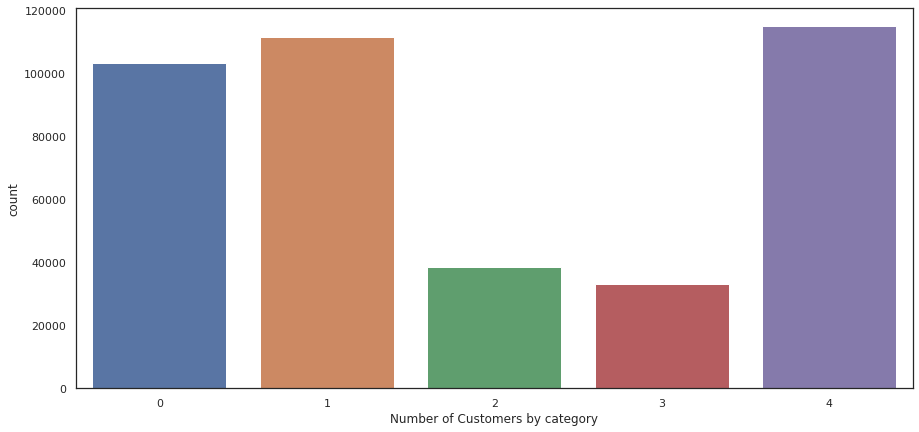

In [280]:
plt.figure(figsize=(15,7))
sns.countplot(df_cleaned['Customer_categ']) #Clusterwise
plt.xlabel("Number of Customers by category")
plt.show()

**Conclusion**


Dataset with details on purchases made on an E-commerce platform over a period of one year. Each entry in the dataset describes the purchase of a product, by a particular customer and at a given date. In total, approximately ∼4000 clients appear in the database. 

As an e-commerce platform, it is very important to profile the customers, dividing the clientele base into groups based on their needs and expectations. Grouping will help us come up with dedicated marketing strategies and will aid in recommending products to different user bases.

So for that, I 1st grouped all the products into **20 different clusters** by considering the similarity between them.

In the second step, based on the products purchased by the customers i have grouped the customers into **5 different buckets(clusters)**
